In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [10]:
delays = pd.read_csv('delays.csv',parse_dates=[['year', ' month']])
delays.columns

Index(['year_ month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [27]:
df = pd.read_csv("wildlife.csv", parse_dates=[['INCIDENT_MONTH', 'INCIDENT_YEAR']])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
delays_copy = delays.copy().drop(columns='Unnamed: 21')
delays_copy.fillna(0,inplace=True)

In [29]:
ratios_df = pd.DataFrame(delays_copy.groupby('year_ month').sum()['arr_del15']/delays_copy.groupby('year_ month').sum()['arr_flights']).rename_axis('Date').reset_index().rename(columns={0: 'delay_ratio'})

In [46]:
df_copy=df.copy().drop(columns=["TYPE_ENG","AMA","AMO","EMA","EMO","AC_CLASS","AC_MASS","REG","REMAINS_COLLECTED","REMAINS_SENT","RUNWAY","STR_RAD","DAM_RAD","STR_WINDSHLD","STR_NOSE","DAM_NOSE","STR_ENG1","DAM_ENG1","STR_ENG2","DAM_ENG2","STR_ENG3","DAM_ENG3","STR_ENG4","DAM_ENG4","STR_PROP","DAM_PROP","STR_WING_ROT","DAM_WING_ROT","STR_FUSE","DAM_FUSE","STR_LG","DAM_LG","STR_TAIL","DAM_TAIL","STR_LGHTS","DAM_LGHTS","STR_OTHER","DAM_OTHER","OTHER_SPECIFY","REPORTED_NAME","REPORTED_TITLE","TRANSFER", "Unnamed: 101"])
df_count = df_copy['INCIDENT_MONTH_INCIDENT_YEAR'].value_counts(sort=False).rename_axis('Year').reset_index(name='counts')


In [64]:
ratios_df.head(10)

,Date,delay_ratio
0,2003-06-01,0.166713
1,2003-07-01,0.187227
2,2003-08-01,0.190896
3,2003-09-01,0.127694
4,2003-10-01,0.125630
5,2003-11-01,0.182094
6,2003-12-01,0.217226
7,2004-01-01,0.219587
8,2004-02-01,0.206756
9,2004-03-01,0.172978


In [53]:
df_count = df_count.sort_values(by='Year')
df_count.head()

,Year,counts
158,2000-01-01,214
143,2000-02-01,249
112,2000-03-01,307
218,2000-04-01,443
131,2000-05-01,552


In [55]:
delays['year_ month']

0        2004-01-01
1        2004-01-01
2        2004-01-01
3        2004-01-01
4        2004-01-01
            ...    
273805   2019-01-01
273806   2019-01-01
273807   2019-01-01
273808   2019-01-01
273809   2019-01-01
Name: year_ month, Length: 273810, dtype: datetime64[ns]

In [65]:
counts = df_count[df_count.Year >= np.datetime64('2003-06-01')]

In [66]:
counts

,Year,counts
59,2003-06-01,548
219,2003-07-01,755
82,2003-08-01,861
190,2003-09-01,898
103,2003-10-01,827
...,...,...
19,2019-08-01,2135
5,2019-09-01,2043
160,2019-10-01,1988
144,2019-11-01,1085


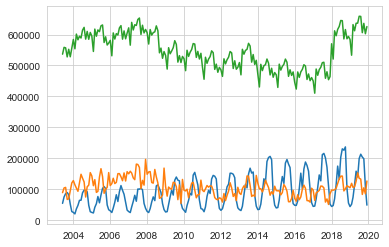

In [72]:
plt.plot(counts.Year, counts.counts*100)
plt.plot(counts.Year, delays_copy.groupby('year_ month').sum()['arr_del15'])
plt.plot(counts.Year, delays_copy.groupby('year_ month').sum()['arr_flights'])
plt.show()